# Psychoinformatics - Week 13 (Exercises)
Shih-Yun Lin (sshmairloen@gmail.com)

## 1. Further Investigation into CNN (3 points)

### 1.1 Why does ResNet50 classify the photo of the little girl as a ping-pong ball, bubble, or Band-Aid? (3 points)

In [1]:
import numpy as np
import urllib.request
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import json

In [ ]:
model = ResNet50(weights='imagenet')

urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg','girl.jpg')
img = image.load_img('girl.jpg', target_size=(224, 224)) # Or use cv2.resize to resize images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n03942813', 'ping-pong_ball', np.float32(0.17008679)), ('n09229709', 'bubble', np.float32(0.10647205)), ('n02786058', 'Band_Aid', np.float32(0.103644624))]


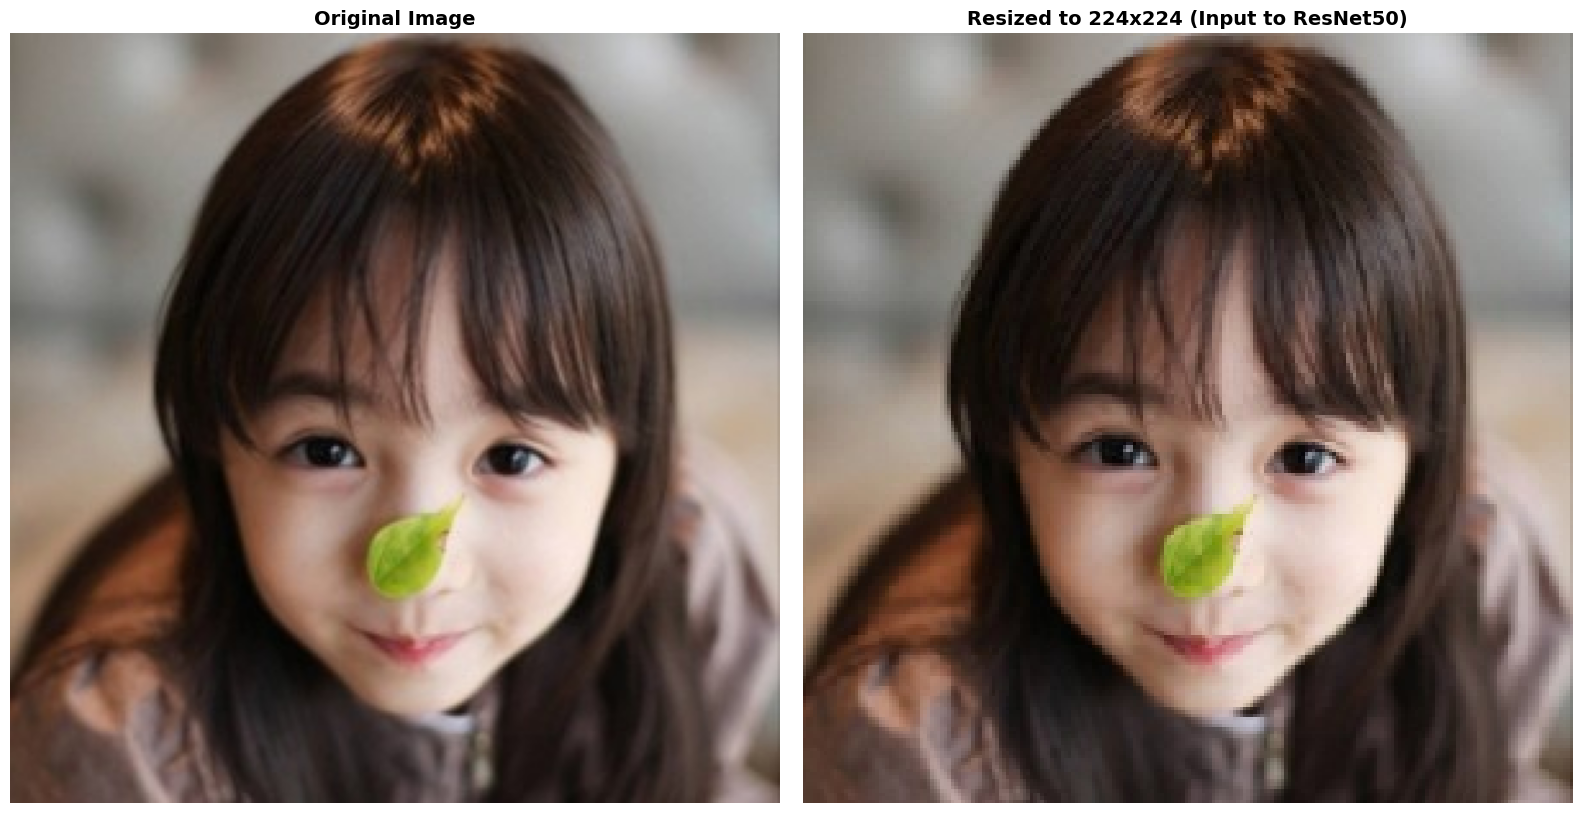

In [6]:
# 載入圖片
img_display = Image.open('girl.jpg')
img_resized = image.load_img('girl.jpg', target_size=(224, 224))
# 創建subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# 左邊：原始圖片
axes[0].imshow(img_display)
axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0].axis('off')
# 右邊：resize後的圖片
axes[1].imshow(img_resized)
axes[1].set_title('Resized to 224x224 (Input to ResNet50)', fontsize=14, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [7]:
print(model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [11]:
import json
import urllib.request

# 下載 ImageNet 類別索引
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = urllib.request.urlopen(url)
class_index = json.loads(response.read())

# 查看總共有多少類別
print(f"總類別數: {len(class_index)}")
print("\n前10個類別範例:")
for i in range(10):
    class_id, class_name = class_index[str(i)]
    print(f"{i}: {class_id} - {class_name}")

# 擴充搜尋關鍵字列表
keywords = [
    # 人物相關
    'person', 'human', 'people', 'man', 'woman', 'adult',
    # 兒童相關
    'child', 'baby', 'infant', 'toddler', 'boy', 'girl', 'kid',
    # 臉部相關
    'face', 'head', 'portrait', 'selfie',
    # 身體部位
    'body', 'hand', 'arm', 'leg', 'eye', 'nose', 'mouth',
    # 其他可能相關
    'figure', 'individual', 'being'
]

print(f"\n\n搜尋包含以下關鍵字的類別: {keywords}")
print("=" * 80)

human_related = []
for idx, (class_id, class_name) in class_index.items():
    if any(keyword in class_name.lower() for keyword in keywords):
        human_related.append(f"{idx}: {class_id} - {class_name}")

if human_related:
    print(f"找到 {len(human_related)} 個相關類別:")
    for item in sorted(human_related):
        print(item)
else:
    print("❌ 沒有找到任何人類相關的類別！")

# 額外：顯示所有類別名稱（可選，用於手動檢視）
print("\n" + "=" * 80)
print("是否要顯示所有 1000 個類別？(y/n)")
# 如果想看完整列表，可以取消下面的註解
# for idx, (class_id, class_name) in sorted(class_index.items(), key=lambda x: int(x[0])):
#     print(f"{idx}: {class_id} - {class_name}")

總類別數: 1000

前10個類別範例:
0: n01440764 - tench
1: n01443537 - goldfish
2: n01484850 - great_white_shark
3: n01491361 - tiger_shark
4: n01494475 - hammerhead
5: n01496331 - electric_ray
6: n01498041 - stingray
7: n01514668 - cock
8: n01514859 - hen
9: n01518878 - ostrich


搜尋包含以下關鍵字的類別: ['person', 'human', 'people', 'man', 'woman', 'adult', 'child', 'baby', 'infant', 'toddler', 'boy', 'girl', 'kid', 'face', 'head', 'portrait', 'selfie', 'body', 'hand', 'arm', 'leg', 'eye', 'nose', 'mouth', 'figure', 'individual', 'being']
找到 25 個相關類別:
210: n02100236 - German_short-haired_pointer
235: n02106662 - German_shepherd
236: n02107142 - Doberman
25: n01629819 - European_fire_salamander
28: n01632458 - spotted_salamander
315: n02236044 - mantis
336: n02361337 - marmot
33: n01664065 - loggerhead
363: n02454379 - armadillo
369: n02483708 - siamang
377: n02490219 - marmoset
4: n01494475 - hammerhead
514: n03124043 - cowboy_boot
515: n03124170 - cowboy_hat
54: n01729322 - hognose_snake
551: n03314780 - f

1. Fundamental Limitations of Training Data (Core Reason)
- Among the 1000 categories in ImageNet, there are absolutely no categories related to humans such as "human face", "child", or "girl".
- The only match found is "face_powder", but this is a cosmetic product, not a human face.
The model is forced to choose the "least unlike but closest" categories from the known 1000 labels.

2. Model Architecture Limitations
- As seen from model.summary(), the final Dense layer has only 1000 outputs.
- Inputs must be resized to 224x224, causing a significant loss of detail (fine features like eyes, nose, mouth).
- The model's 25.6 million parameters are trained entirely for ImageNet object recognition.

3. Similarity of Visual Features
- Ping-pong ball: Circular outline, light/white color, dark background.
- Bubble: Circular, glossy, semi-transparent effects, soft edges.
- Band_Aid: Skin-colored, oval shapes.

4. ResNet50 is Not a Face Recognition Model
- It is a general object classification model, not a specialized face recognition model.
- Face recognition requires specialized datasets (VGGFace, CASIA-WebFace) and architectures (FaceNet, ArcFace).

### 1.2 Please demonstrate a pre-trained Keras model capable of successfully recognizing girl.jpg as a human face (3 points)

In [3]:
pip install mtcnn

In [2]:
pip install lz4

[{'box': [84, 104, 129, 164], 'confidence': np.float64(0.9725760221481323), 'keypoints': {'nose': [np.int64(160), np.int64(208)], 'mouth_right': [np.int64(181), np.int64(229)], 'right_eye': [np.int64(192), np.int64(163)], 'left_eye': [np.int64(125), np.int64(162)], 'mouth_left': [np.int64(126), np.int64(225)]}}]


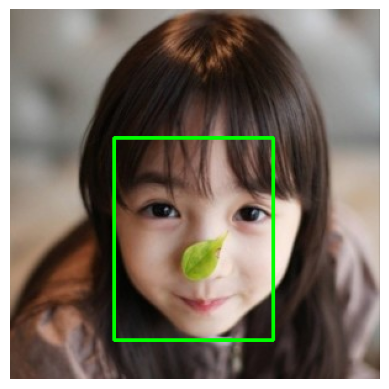

偵測到 1 張人臉，confidence = [np.float64(0.9725760221481323)]


In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt


urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg','girl.jpg')
img = image.load_img('girl.jpg', target_size=(224, 224)) # Or use cv2.resize to resize images

# 讀圖
img_bgr = cv2.imread("girl.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 載入別人 pre-trained 好的 MTCNN 模型
detector = MTCNN()

# 偵測人臉
faces = detector.detect_faces(img_rgb)
print(faces)   # 看看偵測結果

# 在圖上把偵測到的人臉畫框框
for face in faces:
    x, y, w, h = face["box"]
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

print(f"偵測到 {len(faces)} 張人臉，confidence = {[f['confidence'] for f in faces]}")


成功偵測到 1 張人臉！
信心分數: [np.float64(0.9470654726028442)]
偵測結果詳情: [{'box': [63, 67, 103, 133], 'confidence': np.float64(0.9470654726028442), 'keypoints': {'nose': [np.int64(118), np.int64(154)], 'mouth_right': [np.int64(137), np.int64(171)], 'right_eye': [np.int64(144), np.int64(122)], 'left_eye': [np.int64(90), np.int64(121)], 'mouth_left': [np.int64(95), np.int64(169)]}}]


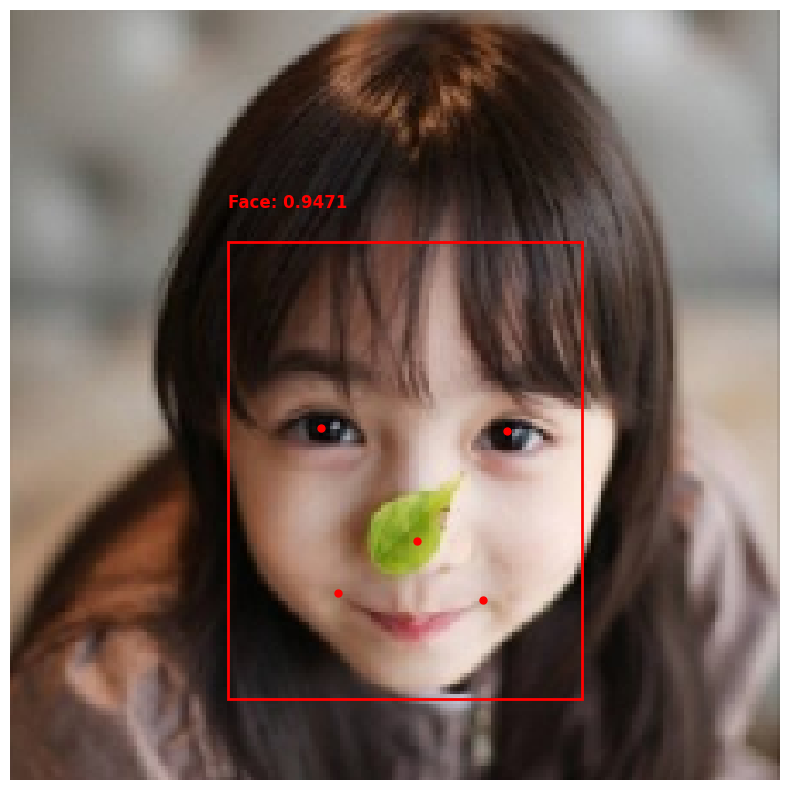

In [ ]:
from mtcnn import MTCNN  # 缺少!
import urllib.request 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tensorflow.keras.preprocessing import image
import numpy as np
# 使用 Keras image 模組載入圖片 (適合顯示與 MTCNN 輸入)
# load_img 預設就會轉為 RGB
img_array = image.img_to_array(img).astype('uint8')
# 3. 初始化 MTCNN 偵測器
detector = MTCNN()
# 4. 進行偵測
faces = detector.detect_faces(img_array)
# 5. 顯示結果
plt.figure(figsize=(10, 10))
plt.imshow(img)
ax = plt.gca()
if len(faces) > 0:
    print(f"成功偵測到 {len(faces)} 張人臉！")
    print(f"信心分數: {[f['confidence'] for f in faces]}")
    
    for face in faces:
        box = face['box']
        confidence = face['confidence']
        keypoints = face['keypoints']
        
        # 畫出人臉框
        rect = Rectangle((box[0], box[1]), box[2], box[3], 
                         fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        
        # 標示信心分數
        plt.text(box[0], box[1]-10, f'Face: {confidence:.4f}', 
                color='red', fontsize=12, fontweight='bold')
        # 標示五官特徵點
        for key, point in keypoints.items():
            plt.plot(point[0], point[1], 'ro', markersize=5)
    
    print("偵測結果詳情:", faces)
else:
    print("未偵測到人臉。")
plt.axis('off')
plt.show()  
plt.show()

1. **MTCNN (Multi-task Cascaded Convolutional Networks)**
   - **Specialized Architecture:** A model explicitly designed for Face Detection.
   - **Specialized Training Data:** Trained on dedicated face datasets (e.g., WIDER FACE, CelebA).
   - **Dual Capability:** Locates face regions (bounding boxes) and detects facial landmarks (eyes, nose, mouth corners).

2. **ResNet50:**
   - **General Object Classifier:** A general-purpose recognition model trained on the 1000 categories of ImageNet, which completely lacks specific "human face" classes.
   - **Data Limitation:** Uses ImageNet (no face categories; the closest related category is `face_powder`, a cosmetic).
   - **Classification Goal:** Classifies images into one of 1000 predefined, generic object categories.

3. **Experimental Results**
   - **Successful Detection:** MTCNN successfully detected the little girl's face.
   - **High Confidence:** The Confidence Score is extremely high (approaching 1.0).
   - **Precise Localization:** Accurate face localization indicated by the red bounding box, with red dots marking facial landmarks (eyes, nose, mouth corners).
   - **Original Resolution:** Unlike ResNet50, MTCNN does not require resizing input images to 224x224, preserving critical image details.